In [92]:
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df_movies = pd.read_csv("../data/ml-latest/movies.csv")
df_ratings = pd.read_csv("../data/ml-latest/ratings.csv")

In [77]:
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [78]:
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
5,1,381,3.5,1225734105
6,1,596,4.0,1225733524
7,1,1036,5.0,1225735626
8,1,1049,3.0,1225734079
9,1,1066,4.0,1225736961


In [79]:
df_movies.describe()

,movieId
count,86537.000000
mean,155932.817096
std,78037.145347
min,1.000000
25%,111443.000000
50%,164574.000000
75%,211225.000000
max,288983.000000


In [80]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,3.383216e+07,3.383216e+07,3.383216e+07,3.383216e+07
mean,1.654380e+05,2.831348e+04,3.542540e+00,1.269362e+09
std,9.534122e+04,4.992865e+04,1.063959e+00,2.541023e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,8.295300e+04,1.219000e+03,3.000000e+00,1.046718e+09
50%,1.661290e+05,3.263000e+03,4.000000e+00,1.264740e+09
75%,2.474500e+05,4.049100e+04,4.000000e+00,1.496919e+09
max,3.309750e+05,2.889830e+05,5.000000e+00,1.689843e+09


In [81]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [82]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


## 1.1B

In [83]:
ratings_top = pd.DataFrame(df_ratings.groupby("movieId")["rating"].count().sort_values(ascending=False).head(10)).rename(columns={"rating":"Ratings_Count"})
ratings_top

,Ratings_Count
movieId,
318,122296
356,113581
296,108756
2571,107056
593,101802
260,97202
2959,86207
527,84232
480,83026


In [84]:
movie_ratings_count_top = df_movies.merge(ratings_top, on = "movieId").sort_values(by="Ratings_Count", ascending=False)
movie_ratings_count_top

,movieId,title,genres,Ratings_Count
2,318,"Shawshank Redemption, The (1994)",Crime|Drama,122296
3,356,Forrest Gump (1994),Comedy|Drama|Romance|War,113581
1,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,108756
8,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,107056
6,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,101802
0,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,97202
9,2959,Fight Club (1999),Action|Crime|Drama|Thriller,86207
5,527,Schindler's List (1993),Drama|War,84232
4,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,83026
7,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,80200


## 1.1C

In [85]:
movie_ids = movie_ratings_count_top["movieId"]
movie_ids

2     318
3     356
1     296
8    2571
6     593
0     260
9    2959
5     527
4     480
7    1196
Name: movieId, dtype: int64

In [86]:
movie_ratings_top= df_ratings[df_ratings["movieId"].isin(movie_ids)]
movie_ratings_top

,userId,movieId,rating,timestamp
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
10,1,1196,3.5,1225735441
26,1,2571,2.5,1225736197
113,2,296,5.0,835815554
...,...,...,...,...
33831871,330975,480,2.5,1091584495
33831877,330975,527,3.5,1091583091
33831890,330975,593,3.0,1091584487
33831937,330975,1196,2.5,1091582641


In [87]:
movie_ratings_top_mean = movie_ratings_top.groupby("movieId")["rating"].mean()
movie_ratings_top_mean

movieId
260     4.092400
296     4.191778
318     4.416792
356     4.068189
480     3.689013
527     4.242337
593     4.150287
1196    4.118030
2571    4.160631
2959    4.236019
Name: rating, dtype: float64

In [88]:
tiles_mean = df_movies.merge(movie_ratings_top_mean, on="movieId").rename(columns={"rating":"rating_mean"}).set_index("movieId").sort_values(by="rating_mean", ascending=False)
tiles_mean

,title,genres,rating_mean
movieId,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,4.416792
527,Schindler's List (1993),Drama|War,4.242337
2959,Fight Club (1999),Action|Crime|Drama|Thriller,4.236019
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.191778
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.160631
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.150287
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,4.118030
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.092400
356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.068189


## 1.1D

In [89]:
movie_year= df_movies["title"].str.extract(r"\((\d{4})\)")

movie_year.columns = ["year"]
movie_year

,year
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
86532,2021
86533,2021
86534,1973
86535,2023


In [90]:
total_movies_year = movie_year.groupby("year")["year"].count().reset_index(name= "count").astype(int)
total_movies_year

,year,count
0,1874,1
1,1878,2
2,1880,1
3,1882,1
4,1883,1
...,...,...
137,2019,3058
138,2020,2628
139,2021,2297
140,2022,1962


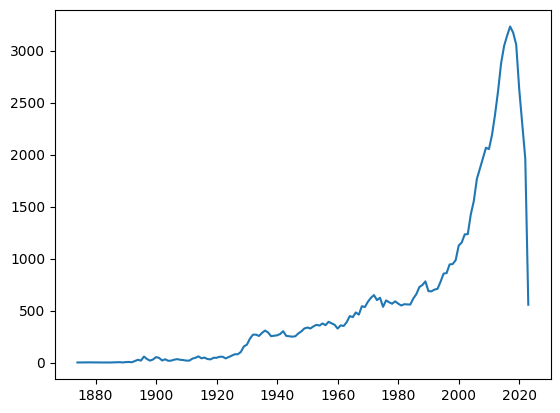

In [95]:
labels = total_movies_year["year"]

#plt.figure()
plt.plot(total_movies_year["year"], total_movies_year["count"])